<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-07-07 14:43:31--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211415040 (202M) [application/octet-stream]
Saving to: 'survey-data.sqlite'

     0K .......... .......... .......... .......... ..........  0%  149K 23m8s
    50K .......... .......... .......... .......... ..........  0%  213K 19m38s
   100K .......... .......... .......... .......... ..........  0%  350K 16m22s
   150K .......... .......... .......... .......... ..........  0%  477K 14m4s
   200K .......... .......... .......... .......... ..........  0%  856K 12m4s
   250K ...

#### Install the required libraries and import them


In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [3]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [4]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [5]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [6]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


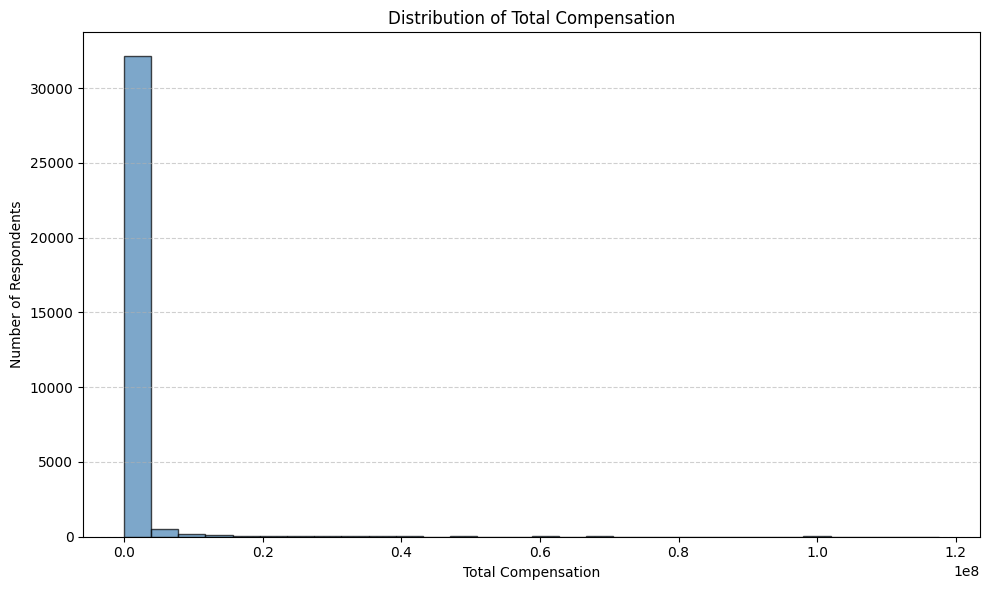

In [8]:
## Write your code here
QUERY = """
SELECT CompTotal
FROM main 
WHERE CompTotal IS NOT NULL
"""

df_comp = pd.read_sql_query(QUERY, conn)

# Step 1: Ensure CompTotal is numeric
df_comp['CompTotal'] = pd.to_numeric(df_comp['CompTotal'], errors='coerce')

# Step 2: Drop missing values
df_clean = df_comp['CompTotal'].dropna()

# Optional: Remove extreme outliers (top 1%) for better visualization
df_clean = df_clean[df_clean < df_clean.quantile(0.99)]

# Step 3: Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df_clean, bins=30, color='steelblue', edgecolor='black', alpha=0.7)

plt.title('Distribution of Total Compensation')
plt.xlabel('Total Compensation')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


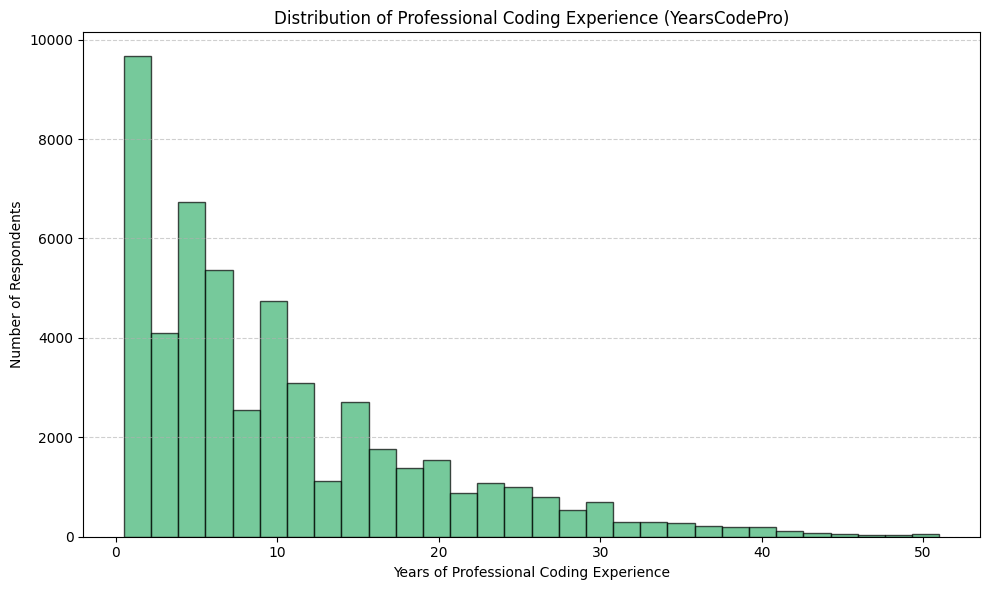

In [10]:
## Write your code here
QUERY = """
SELECT YearsCodePro FROM main
WHERE YearsCodePro IS NOT NULL  
"""
df_years_code = pd.read_sql_query(QUERY, conn)

def convert_years_code_pro(value):
    if pd.isna(value):
        return None
    if isinstance(value, str):
        value = value.strip().lower()
        if 'less than' in value:
            return 0.5
        elif 'more than' in value:
            return 51
        try:
            return float(value)
        except ValueError:
            return None
    return value

df_years_code['YearsCodePro'] = df_years_code['YearsCodePro'].apply(convert_years_code_pro)

# Step 2: Drop missing values
df_clean = df_years_code['YearsCodePro'].dropna()

# Step 3: Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df_clean, bins=30, color='mediumseagreen', edgecolor='black', alpha=0.7)

plt.title('Distribution of Professional Coding Experience (YearsCodePro)')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


In [11]:
import seaborn as sns

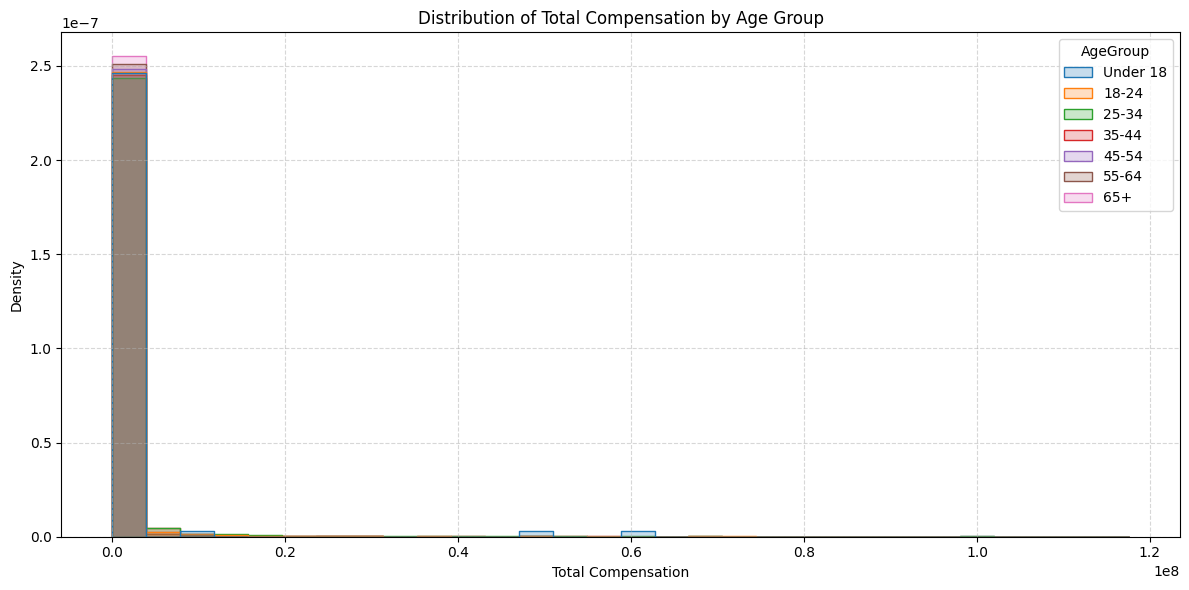

In [14]:
## Write your code here
QUERY = """
SELECT Age, CompTotal 
FROM main 
WHERE Age IS NOT NULL AND CompTotal IS NOT NULL
"""
df_age_comp = pd.read_sql_query(QUERY, conn)

# Step 1: Convert CompTotal to numeric and drop missing values
df_age_comp['CompTotal'] = pd.to_numeric(df_age_comp['CompTotal'], errors='coerce')
df_age_comp = df_age_comp.dropna(subset=['CompTotal', 'Age'])

# Step 2: Optional — Trim top 1% compensation outliers
df_age_comp = df_age_comp[df_age_comp['CompTotal'] < df_age_comp['CompTotal'].quantile(0.99)]

# Step 3: Clean and normalize Age labels
df_age_comp['AgeGroup'] = df_age_comp['Age'].str.replace(' years old', '', regex=False).str.strip()
df_age_comp['AgeGroup'] = df_age_comp['AgeGroup'].str.replace('Under 18', 'Under 18')
df_age_comp['AgeGroup'] = df_age_comp['AgeGroup'].str.replace('65 years or older', '65+')

# Step 4: Filter out non-informative responses (optional)
exclude_ages = ['Prefer not to say']
df_age_comp = df_age_comp[~df_age_comp['AgeGroup'].isin(exclude_ages)]

# Step 5: Define order for plotting
age_order = ['Under 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Step 6: Plot histogram with Seaborn
plt.figure(figsize=(12, 6))
sns.histplot(data=df_age_comp, x='CompTotal', hue='AgeGroup', element='step', bins=30,
             common_norm=False, stat='density', hue_order=age_order)

plt.title('Distribution of Total Compensation by Age Group')
plt.xlabel('Total Compensation')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


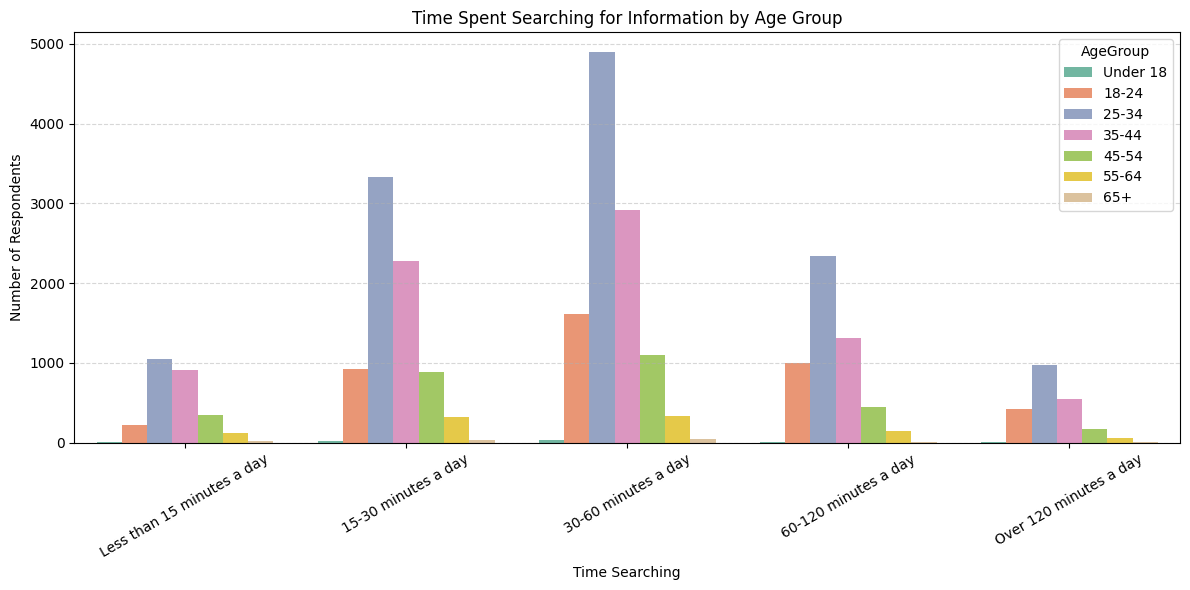

In [27]:
## Write your code here
QUERY = """
SELECT Age, TimeSearching
FROM main
WHERE Age IS NOT NULL AND TimeSearching IS NOT NULL
"""

# Step 1: Clean the age group labels
df['AgeGroup'] = (
    df['Age']
    .str.replace(' years old', '', regex=False)
    .str.replace('65 years or older', '65+', regex=False)
    .str.replace('Under 18 years old', 'Under 18', regex=False)
    .str.strip()
)

# Step 2: Filter out 'Prefer not to say'
df = df[df['AgeGroup'] != 'Prefer not to say']

# Step 3: Define desired order for plotting
age_order = ['Under 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
time_order = [
    'Less than 15 minutes a day',
    '15-30 minutes a day',
    '30-60 minutes a day',
    '60-120 minutes a day',
    'Over 120 minutes a day'
]

# Step 4: Drop missing values in TimeSearching
df = df.dropna(subset=['TimeSearching'])

# Step 5: Plot bar chart using countplot (categorical histogram)
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df,
    x='TimeSearching',
    hue='AgeGroup',
    order=time_order,
    hue_order=age_order,
    palette='Set2'
)

plt.title('Time Spent Searching for Information by Age Group')
plt.xlabel('Time Searching')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


C:\Users\Rajveer Kaur\AppData\Local\Temp\ipykernel_17160\3229557969.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_databases.values, y=top_databases.index, palette='viridis')


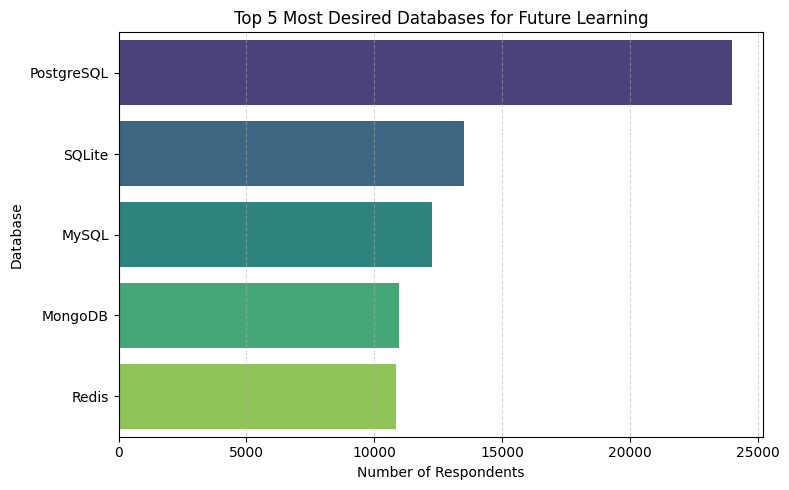

In [29]:
## Write your code here

QUERY = """
SELECT DatabaseWantToWorkWith
FROM main
WHERE DatabaseWantToWorkWith IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Step 1: Drop missing values
df_filtered = df['DatabaseWantToWorkWith'].dropna()

# Step 2: Split each row by semicolon into a list
all_databases = df_filtered.str.split(';')

# Step 3: Flatten the list into one long column
database_list = all_databases.explode().str.strip()

# Step 4: Count frequencies
top_databases = database_list.value_counts().head(5)

# Step 5: Plot as a bar chart (histogram style)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_databases.values, y=top_databases.index, palette='viridis')

plt.title('Top 5 Most Desired Databases for Future Learning')
plt.xlabel('Number of Respondents')
plt.ylabel('Database')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


C:\Users\Rajveer Kaur\AppData\Local\Temp\ipykernel_17160\2165837230.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=work_counts.values, y=work_counts.index, palette='pastel')


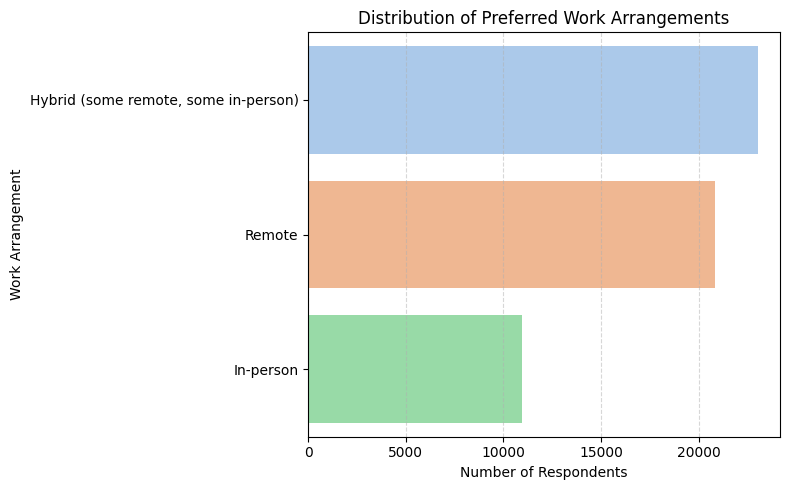

In [31]:
## Write your code here
QUERY = """
SELECT RemoteWork
FROM main
WHERE RemoteWork IS NOT NULL
"""

df = pd.read_sql_query(QUERY, conn)

# Step 1: Drop missing values (if any)
df_clean = df.dropna(subset=['RemoteWork'])

# Step 2: Count work arrangement types
work_counts = df_clean['RemoteWork'].value_counts()

# Step 3: Plot as a histogram-style bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=work_counts.values, y=work_counts.index, palette='pastel')

plt.title('Distribution of Preferred Work Arrangements')
plt.xlabel('Number of Respondents')
plt.ylabel('Work Arrangement')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


C:\Users\Rajveer Kaur\AppData\Local\Temp\ipykernel_17160\3801776841.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mid_career['CompTotal'] = pd.to_numeric(df_mid_career['CompTotal'], errors='coerce')


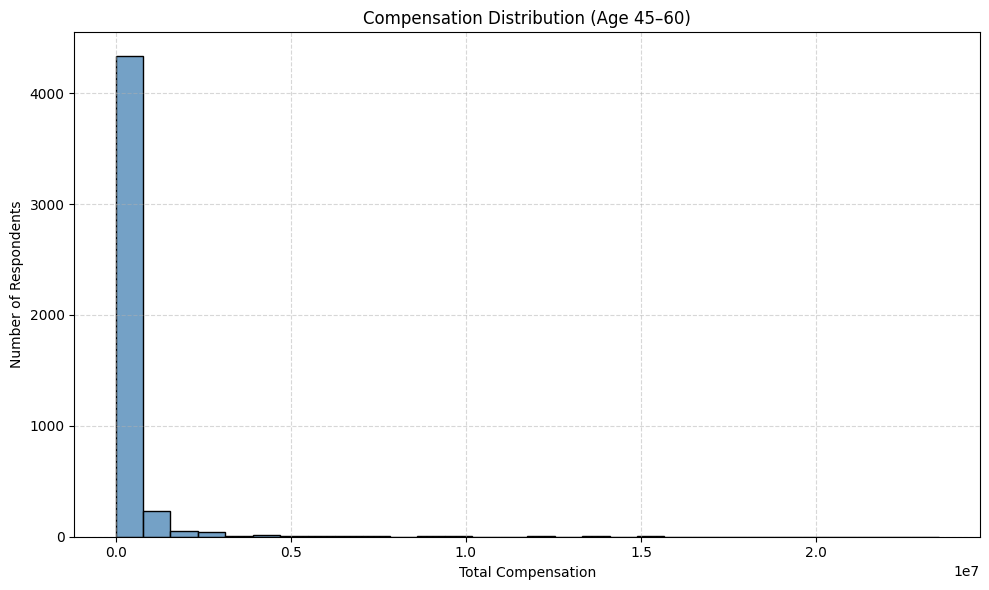

In [34]:
## Write your code here
QUERY = """
SELECT CompTotal, Age
FROM main
WHERE CompTotal IS NOT NULL AND Age IS NOT NULL
"""

df = pd.read_sql_query(QUERY, conn)

# Step 1: Filter for age groups 45–60
mid_age_groups = ['45-54 years old', '55-64 years old']
df_mid_career = df[df['Age'].isin(mid_age_groups)]

# Step 2: Convert CompTotal to numeric and drop NaN values
df_mid_career['CompTotal'] = pd.to_numeric(df_mid_career['CompTotal'], errors='coerce')
df_mid_career = df_mid_career.dropna(subset=['CompTotal'])

# Step 3: Optional – Trim top 1% to reduce skew from extreme salaries
df_mid_career = df_mid_career[df_mid_career['CompTotal'] < df_mid_career['CompTotal'].quantile(0.99)]

# Step 4: Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_mid_career['CompTotal'], bins=30, color='steelblue', edgecolor='black')

plt.title('Compensation Distribution (Age 45–60)')
plt.xlabel('Total Compensation')
plt.ylabel('Number of Respondents')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


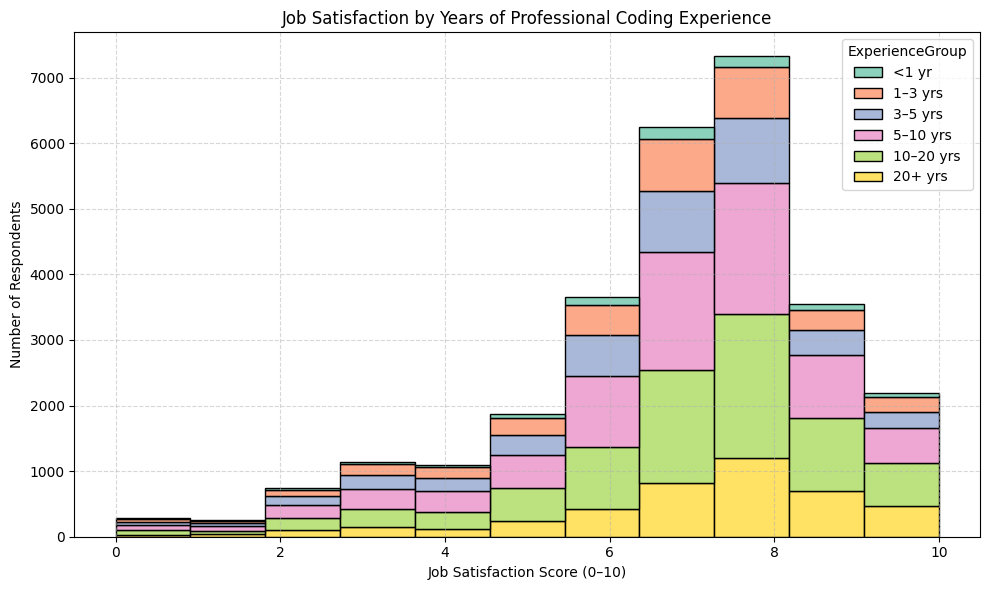

In [37]:
## Write your code here
QUERY = """
SELECT JobSat, YearsCodePro
FROM main   
WHERE JobSat IS NOT NULL AND YearsCodePro IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Step 1: Clean YearsCodePro
def convert_years(value):
    if value == "Less than 1 year":
        return 0
    elif value == "More than 50 years":
        return 51
    else:
        try:
            return int(value)
        except:
            return None

df['YearsCodePro'] = df['YearsCodePro'].apply(convert_years)

# Step 2: Convert JobSat to numeric
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')

# Step 3: Drop missing values
df_clean = df.dropna(subset=['YearsCodePro', 'JobSat'])

# Step 4: Bin experience levels for grouping (optional)
bins = [0, 1, 3, 5, 10, 20, 51]
labels = ['<1 yr', '1–3 yrs', '3–5 yrs', '5–10 yrs', '10–20 yrs', '20+ yrs']
df_clean['ExperienceGroup'] = pd.cut(df_clean['YearsCodePro'], bins=bins, labels=labels, right=False)

# Step 5: Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_clean,
    x='JobSat',
    hue='ExperienceGroup',
    multiple='stack',
    bins=11,
    palette='Set2',
    edgecolor='black'
)

plt.title('Job Satisfaction by Years of Professional Coding Experience')
plt.xlabel('Job Satisfaction Score (0–10)')
plt.ylabel('Number of Respondents')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [ ]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
